### 멕시코풍 프랜차이즈 chipotle의 주문데이터 분석


In [1]:
import pandas as pd

path = "./python-data-analysis-master/data/chipotle.tsv"
chipo = pd.read_csv(path, sep = '\t')

print(chipo.shape)
print(chipo.info()) #결측치가 있는것을 볼수 있다

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [2]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [4]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### 피쳐의 종류

#### 수치형:
##### -연속형 피쳐 : 어떤 구간안의 모든 값을 데이터로 써 가질 수 있다
##### -비연속형 피쳐 셀 수 있으며, 일정 구간안에서 정해진 몇개의 값을 가져야한다

#### 범주형:
##### -순서 범주형 : 순서가 있다(Rank)
##### -순서 없는 범주형 :순서가 없다

In [5]:
numeric = ['order_id', 'quantity']
category = ['item_name', 'choice_description', 'item_price']

In [7]:
#astype으로 데이터 종류를 바꾼다
chipo['order_id'] = chipo['order_id'].astype(str) #숫자의 의미가 아니기 때문에 문자로 바꾸어준다
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


### 범주형 피쳐 

In [8]:
print(len(chipo['order_id'].unique()))

print(len(chipo['item_name'].unique()))
#데이터 셋에 총 50개의 주문 아이템이 존재함

1834
50


### 데이터 시각화

In [20]:
#가장 많이 주문한 아이템 Top 10개 출력

item_count = chipo['item_name'].value_counts()[:10]
#item_count.iteritems() : 인덱스에 번호를 맞추어 주는것
for idx, (val, cnt) in enumerate(item_count.iteritems(),1):
    print("TOP", idx, ":", val, cnt)
#Chickcen Bowl이 가장 인기 있는 아이템

TOP 1 : Chicken Bowl 726
TOP 2 : Chicken Burrito 553
TOP 3 : Chips and Guacamole 479
TOP 4 : Steak Burrito 368
TOP 5 : Canned Soft Drink 301
TOP 6 : Steak Bowl 211
TOP 7 : Chips 211
TOP 8 : Bottled Water 162
TOP 9 : Chicken Soft Tacos 115
TOP 10 : Chips and Fresh Tomato Salsa 110


In [22]:
#아이템별 주문 개수와 총량 구하기

#아이템별 주문 개수를 출력 (아이템 주문자수(group by))
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [92]:
#아이템별 주문 총량 계산
item_quantity = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
item_quantity[:20]

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Chicken Salad Bowl              123
Chicken Soft Tacos              120
Side of Chips                   110
Veggie Burrito                   97
Barbacoa Burrito                 91
Veggie Bowl                      87
Carnitas Bowl                    71
Barbacoa Bowl                    66
Carnitas Burrito                 60
Steak Soft Tacos                 56
Name: quantity, dtype: int64

['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink', 'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos', 'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos', 'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos', 'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips', 'Chips and Fresh Tomato Salsa', 'Chips and Guacamole', 'Chips and Mild Fresh Tomato Salsa', 'Chips and Roasted Chili Corn Salsa', 'Chips and Roasted Chili-Corn Salsa', 'Chips and Tomatillo Green Chili Salsa', 'Chips and Tomatillo Red Chili Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze', 'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl', 'Steak Burrito', 'Steak Crispy Tacos', 'Steak Salad', 'Steak Salad Bowl', 'Steak Soft Tacos', 'Veggie Bowl', 'Veggie Burrito', 'Veg

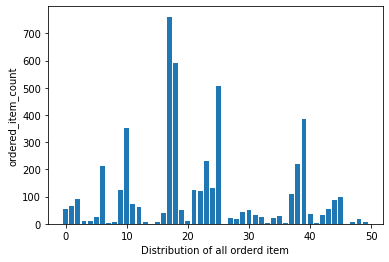

In [34]:
#시각화로 분석하기
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#index
item_name_list = item_quantity.index.tolist()
print(item_name_list)
#values
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
print(order_cnt)
plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('ordered_item_count')
plt.xlabel('Distribution of all orderd item')
plt.show()


#50개 중 상위 8개 정도의 아이템에 주문이 집중됨을 그래프로 알수 있다 


### 데이터 전처리

In [35]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [36]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

### apply 
##### apply() 함수는 시리즈 단위의 연산을 처리하는 기능을 수행하면 sum()이나 mean()과 같이 정의된 함수를 파라미터로 받는다 

In [37]:
#달러표시 제거 ($로 인해 str로 되어있다 )
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
#describe는 수치형 데이터를 요약해준다 
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


### 탐색적 분석: 스무고개로 개념적 탐색 분석

In [42]:
#주문당 평균 계산금액 출력
chipo.groupby('order_id')['item_price'].sum()


order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [43]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [45]:
#한 주문에 10달러 이상 지불한 주문 번호(id) 출력하기

chipo_orderid_group = chipo.groupby('order_id').sum()
chipo_orderid_group

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [47]:
result = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(result[:10])
print("\n\n\n\n",result.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40




 ['1' '10' '100' ... '997' '998' '999']


In [53]:
#각 아이템 가격 구하기
#수량 1개 구매 
chipo_one_item = chipo[chipo.quantity == 1]
#min()  그룹별 최저가 계산(price인거 같다 )
price_per_item = chipo_one_item.groupby('item_name').min()
#sort_values()로 데이터 정렬
price_per_item.sort_values(by = 'item_price', ascending = False)[:10]



,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [79]:
#index 만들기
item_name_list = price_per_item.index.tolist()
#list 갯수 범위
x_pos = np.arange(len(item_name_list))
#정렬된 아이템 리스로 (굳이 list로?)
item_price = price_per_item['item_price'].tolist()
print(np.array(item_price).shape)

(50,)


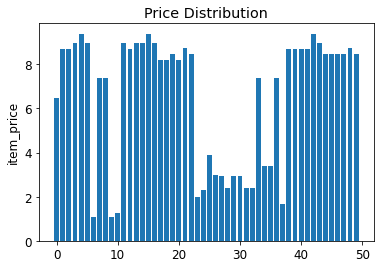

In [74]:
fontprop = fm.FontProperties(fname=path)
plt.bar(x_pos, item_price, align = 'center')
plt.ylabel('item_price')
plt.title("Price Distribution")
plt.show()

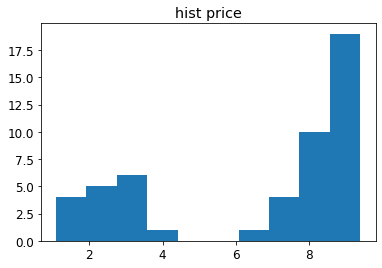

In [75]:
#hist는 범위를 지정
plt.hist(item_price)
plt.ylabel
plt.title("hist price")
plt.show()
#각 아이템의 대략적인 가격

In [97]:
#가장 비싼 주문에서 아이템이 총 몇개 팔렸는지 
chipo.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False)[:5]
chipo.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False).describe()
#주문당 평균 계산 금액

,quantity,item_price
count,1834.000000,1834.000000
mean,2.711014,18.811429
std,1.677624,11.652512
min,1.000000,10.080000
25%,2.000000,12.572500
50%,2.000000,16.200000
75%,3.000000,21.960000
max,35.000000,205.250000


1834 1834


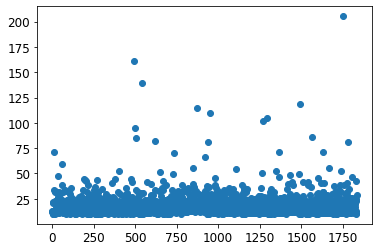

In [115]:
a=chipo.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False)
print(len(a),len(chipo.groupby('order_id').sum()))
plt.scatter(x = np.arange(len(a))  ,y=chipo.groupby('order_id').sum()['item_price'])

In [85]:
#Veggi Salad Bowl이 몇번 주문 되었는지 구하기
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
chipo_salad.shape


(18, 5)

In [89]:
#한 주문 내에서 중복된 집게된 item_name을 제거
chipo_salad = chipo_salad.drop_duplicates(['item_name','order_id'])
chipo_salad

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


In [88]:
#Chicken Bowl을 2개 이상 주문한 주문횟수 구하기
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head()

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

order_id
1       4
10      2
100     2
1000    2
1001    2
       ..
995     3
996     4
997     2
998     2
999     5
Name: quantity, Length: 1834, dtype: int64

In [ ]:
#미니퀴즈 1-1
# value_counts() : 갯수를 세줌 
    #정답: series 객체에서 등장하는 [모든 데이터의 범주]를 각각의 개수와 함께 반환하는 함수
#unique(): 중복을 없앰
    #정답: 모든 [데이터 범주]만을 반환